## 章節 6：決策分析（Dicision Analysis）

### 6.4 PDF 的表示法

用 Python 表示 PDF，thinkbayes.py 提供 Pdf 類別。Pdf 是一個**抽象類別**，它提供一個 Pdf 的介面，定義了應該要實作的方法。Pdf 介面提供兩個方法，Density 和 MakePmf：

<pre>
class Pdf(object):

    def Density(self, x): #  計算 x 其對應的密度
        raise UnimplementedMethodException()

    def MakePmf(self, xs): # 產生一個 PDF 離散近似的 PMF
        pmf = Pmf()
        for x in xs:
            pmf.Set(x, self.Density(x))

        pmf.Normalize()
        return pmf
</pre>

具體型態（concrete type）是一個擴展抽像類型的子類別，並且實作缺少的方法。例如，GaussianPdf 繼承 Pdf 並且實作 Density 方法：

<pre>
class GaussianPdf(Pdf):

    def __init__(self, mu, sigma):
        self.mu = mu # 紀錄平均值
        self.sigma = sigma # 紀錄標準差
        
    def Density(self, x):
        return scipy.stats.norm.pdf(x, self.mu, self,sigma)
</pre>

高斯密度函數是用簡單的數學定義，所以容易計算 x 的密度。並且它很有用，因為有很多真實世界的數值的分佈近似於高斯分佈。

但真實世界的資料並不保證服從高斯分佈或是其他簡單的數學函數。在這種情況下，我們用樣本來估計全體的 PDF。

例如 The Price is Right 資料集，展示品 1 有 313 個價格。我們可以想像這些數值是取樣自某個母體的結果。這些取樣包含以下價格（按順序排列）

$$ 28800, 28868, 28941, 28957, 28958 $$

上方樣本中，沒有出現 28801 和 28867，但應該沒有什麼理由認為這兩種價格不會出現。在這樣的背景下，我們期望此數值範圍的所有數值都具有相同的可能性。換句話說，我們希望 PDF 是平滑的，連續的。

核密度估計（KDE）是一個演算法，它根據樣本來找出一個適當平滑的 PDF 函數。你可以參考：https://en.wikipedia.org/wiki/Kernel_density_estimation

scipy 套件提供 KDE 的實作，而 thinkbayes.py 提供 EstimatedPdf 類別：

<pre>
class EstimatedPdf(Pdf):

    def __init__(self, sample):
        self.kde = scipy.stats.gaussian_kde(sample) # 產生 gaussian_kde 物件
        
    def Density(self, x):
        return self.kde.evaluate(x) # 利用 gaussian_kde 物件的 evaluate 方法得到 x 的密度
</pre>

展示品 1 價格總數 313 比
展示品 2 價格總數 313 比


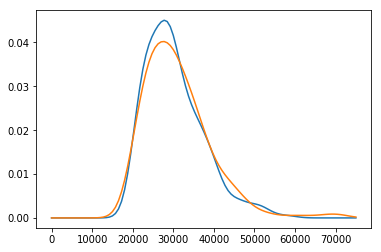

In [32]:
from thinkbayes import EstimatedPdf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_pmf(pmf):
    x, y = zip(*sorted(pmf.Items()))
    plt.plot(x, y)

def simple_read_prices(file, showcase=1):
    col_name = "Showcase %d" % showcase        
    df = df = pd.read_csv(file, index_col=0).T
    return df[col_name].astype(int).values


def get_all_prices(showcase=1):
    data = ["showcases.2011.csv", "showcases.2012.csv"]
    return np.concatenate([simple_read_prices(file, showcase) for file in data])


def plot_kde_prices(showcase=1):
    prices = get_all_prices(showcase)
    print("展示品", showcase, "價格總數", prices.size, "比")
    pdf = EstimatedPdf(prices)

    low, high = 0, 75000
    n = 101
    xs = np.linspace(low, high, n)
    pmf = pdf.MakePmf(xs)
    plot_pmf(pmf)
    
plot_kde_prices(1)
plot_kde_prices(2)